# Tutorial 36: Mean Tail Gini Range Optimization

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%%**********************]  25 of 25 completed


In [2]:
# Calculating returns

Y = data[assets].iloc[-300:,:].pct_change().dropna()

display(Y.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2018-10-19,0.0475%,-0.8599%,-1.4333%,-3.0011%,0.1113%,1.2968%,3.4361%,-0.8764%,0.2945%,-0.7834%,...,0.6339%,-0.1823%,0.9186%,-0.7728%,1.1385%,-1.6075%,-1.1144%,-1.2872%,0.4575%,-0.8025%
2018-10-22,-1.9240%,-0.0786%,-0.6335%,-6.2983%,-0.6392%,-1.1024%,0.0527%,-0.3221%,1.1326%,-0.8199%,...,-0.8661%,0.4483%,-1.6953%,-2.8972%,-0.6085%,1.4752%,-0.6075%,-0.8634%,0.1457%,-3.4490%
2018-10-23,-3.6571%,-1.6658%,-0.4202%,-0.4520%,-0.2797%,-0.5034%,0.1844%,-3.9948%,-0.7051%,-0.2449%,...,0.4766%,-5.1240%,0.5342%,-0.0321%,1.0713%,-0.6729%,-1.0808%,-1.8308%,4.0560%,4.0353%
2018-10-24,-4.5500%,1.3141%,-1.8041%,-3.5933%,-4.2918%,0.8673%,0.9995%,-4.1109%,-3.6759%,-3.7140%,...,3.5178%,-4.2683%,1.5636%,-1.3479%,-8.0557%,-0.4838%,-1.2403%,-4.2187%,0.3671%,-3.3065%
2018-10-25,0.4740%,2.5716%,0.5186%,0.7782%,5.0411%,-0.5733%,-1.1719%,2.1585%,3.1657%,2.3271%,...,-1.0309%,0.4914%,0.5082%,0.9109%,-1.2516%,1.8962%,4.3662%,1.3800%,-1.7241%,3.3538%


## 2. Estimating Mean Tail Gini Range Portfolios

### Tail Gini Range 최적화 설명

**Tail Gini Range** 최적화는 포트폴리오 리스크를 측정하기 위해 Gini 계수를 사용하는 방법 중 하나입니다. 이 접근법은 특히 Tail 리스크를 잘 반영하며, Cajas(2021)가 제안한 OWA(Ordered Weighted Averaging) 포트폴리오 모델의 특정 사례입니다. Tail Gini Range는 리스크 관리에서 자산 수익률 분포의 비대칭성과 극단적인 값의 영향을 고려합니다.

### Gini Mean Difference (GMD)와 Tail Gini Range의 차이점

- **Gini Mean Difference** (GMD) 는 모든 자산 수익률의 절대 차이의 평균을 사용하여 리스크를 측정합니다.
- **Tail Gini Range**는 수익률의 하위 또는 상위 Tail에 집중하여, 극단적인 손실이나 이익에 대한 리스크를 더 정확히 반영합니다.

### Tail Gini Range 최적화의 수학적 표현

Tail Gini Range 최적화는 다음과 같은 목표 함수와 제약 조건을 사용합니다:

1. **목표 함수 (Objective Function)**:
   $$ \min_w \, \text{TGini}(w) $$
   여기서 $ w $는 포트폴리오 가중치 벡터입니다.

2. **제약 조건 (Constraints)**:
   - 가중치의 합은 1이어야 합니다:
     $$ \sum_{i=1}^{n} w_i = 1 $$
   - 각 자산의 가중치는 특정 범위 내에 있어야 합니다:
     $$ l_i \leq w_i \leq u_i $$

### 최적화를 위한 MOSEK 사용

Tail Gini Range를 최적화하는 데는 많은 계산 능력이 필요합니다. MOSEK 솔버는 높은 성능과 효율성을 제공하여 복잡한 최적화 문제를 해결하는 데 적합합니다. 따라서 Tail Gini Range 최적화에는 MOSEK를 사용하는 것이 권장됩니다.

### MOSEK 설치 지침

MOSEK를 설치하려면 아래 링크를 참고하세요. Anaconda를 사용하는 것이 좋습니다. 또한 학술용 라이선스를 요청하는 것을 권장합니다.

- [MOSEK 설치 지침](https://www.mosek.com/products/academic-licenses/)

### Tail Gini Range 최적화 예제 코드

아래는 Riskfolio-Lib를 사용하여 Tail Gini Range를 최적화하는 예제 코드입니다. MOSEK를 설치하고 라이선스를 활성화한 후 실행할 수 있습니다.

```python
import numpy as np
import pandas as pd
import riskfolio as rp
import mosek

# 예시 데이터 생성
np.random.seed(42)
Y = np.random.randn(100, 10)  # 100개의 샘플과 10개의 자산
asset_names = [f'Asset {i}' for i in range(1, 11)]
returns = pd.DataFrame(Y, columns=asset_names)

# 포트폴리오 객체 생성
port = rp.Portfolio(returns=returns)

# 기대 수익률과 공분산 행렬 계산
method_mu = 'hist'
method_cov = 'hist'
port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# MOSEK 솔버 설정
port.solvers = ['MOSEK']
port.sol_params = {'MOSEK': {'mosek_params': {mosek.iparam.num_threads: 2}}}

# 최적화 매개변수 설정
model = 'Classic'  # 사용할 모델: Classic (historical), BL (Black Litterman), FM (Factor Model)
rm = 'TGini'  # Tail Gini Range를 리스크 측정치로 사용
obj = 'Sharpe'  # 목표 함수: Sharpe 비율 최대화
hist = True  # 역사적 시나리오 사용 여부
rf = 0  # 무위험 이자율
l = 0  # 위험 회피 계수 (유틸리티 목표 함수에서만 사용)

# 최적 포트폴리오 계산
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

# 결과 출력
display(w.T)
```

### 코드 설명

1. **데이터 생성**:
   ```python
   np.random.seed(42)
   Y = np.random.randn(100, 10)
   asset_names = [f'Asset {i}' for i in range(1, 11)]
   returns = pd.DataFrame(Y, columns=asset_names)
   ```

   - 예시 데이터를 생성하고 자산 이름을 설정합니다.

2. **포트폴리오 객체 생성 및 통계 계산**:
   ```python
   port = rp.Portfolio(returns=returns)
   method_mu = 'hist'
   method_cov = 'hist'
   port.assets_stats(method_mu=method_mu, method_cov=method_cov)
   ```

   - `Portfolio` 객체를 생성하고, 자산의 기대 수익률과 공분산 행렬을 계산합니다.

3. **MOSEK 솔버 설정**:
   ```python
   port.solvers = ['MOSEK']  # 최적화를 위해 MOSEK 솔버를 사용
   port.sol_params = {'MOSEK': {'mosek_params': {mosek.iparam.num_threads: 2}}}
   ```

   - `port.solvers = ['MOSEK']`: MOSEK 솔버를 사용하여 최적화를 수행하도록 설정합니다.
   - `port.sol_params = {'MOSEK': {'mosek_params': {mosek.iparam.num_threads: 2}}}`: MOSEK 솔버 매개변수를 설정하여 최적화에 사용할 스레드 수를 2로 설정합니다.

4. **최적화 매개변수 설정**:
   ```python
   model = 'Classic'  # 사용할 모델: Classic (historical), BL (Black Litterman), FM (Factor Model)
   rm = 'TGini'  # 위험 측정치: Tail Gini Range 사용
   obj = 'Sharpe'  # 목표 함수: Sharpe 비율 최대화
   hist = True  # 역사적 시나리오 사용
   rf = 0  # 무위험 이자율
   l = 0  # 위험 회피 계수 (유틸리티 목표 함수에서만 사용)
   ```

   - `model = 'Classic'`: 클래식 모델을 사용합니다.
   - `rm = 'TGini'`: Tail Gini Range를 위험 측정치로 사용합니다.
   - `obj = 'Sharpe'`: 목표 함수로 샤프 비율을 최대화하도록 설정합니다.
   - `hist = True`: 역사적 시나리오를 사용합니다.
   - `rf = 0`: 무위험 이자율을 0으로 설정합니다.
   - `l = 0`: 위험 회피 계수를 0으로 설정합니다.

5. **최적 포트폴리오 계산**:
   ```python
   w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
   ```

   - `port.optimization`: 지정된 매개변수를 사용하여 포트폴리오를 최적화합니다.
   - 최적화된 포트폴리오 가중치 벡터 `w`를 반환합니다.

6. **결과 출력**:
   ```python
   display(w.T)
   ```

   - `display(w.T)`: 최적화된 포트폴리오 가중치를 전치하여 보기 좋게 출력합니다.

### 결론

Tail Gini Range는 포트폴리오 리스크를 측정하기 위해 Gini 계수를 사용하여 Tail 리스크를 고려하는 최적화 방법입니다. Cajas(2021)는 OWA 포트폴리오 모델을 기반으로 Tail Gini Range를 제안했습니다. 이 모델을 최적화하는 데는 MOSEK 솔버를 사용하는 것이 좋습니다. MOSEK는 높은 계산 능력을 제공하여 모델의 제약 조건과 변수가 많은 경우에도 효율적으로 최적화를 수행할 수 있습니다.

### 2.1 Calculating the portfolio that optimize return/Tail Gini Range ratio.

In [3]:
import riskfolio as rp
import mosek

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimum portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Estimate optimal portfolio:

port.solvers = ['MOSEK'] # It is recommended to use mosek when optimizing GMD
port.sol_params = {'MOSEK': {'mosek_params': {mosek.iparam.num_threads: 2}}}

port.alpha = 0.05
port.beta = 0.05
model ='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'TGRG' # Risk measure used, this time will be Tail Gini Range
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,16.9523%,0.0000%,0.0000%,0.0000%,...,0.0000%,24.9840%,0.0000%,0.0000%,0.0000%,13.4675%,9.7011%,0.0000%,11.5259%,0.0000%


### 2.2 Plotting portfolio composition

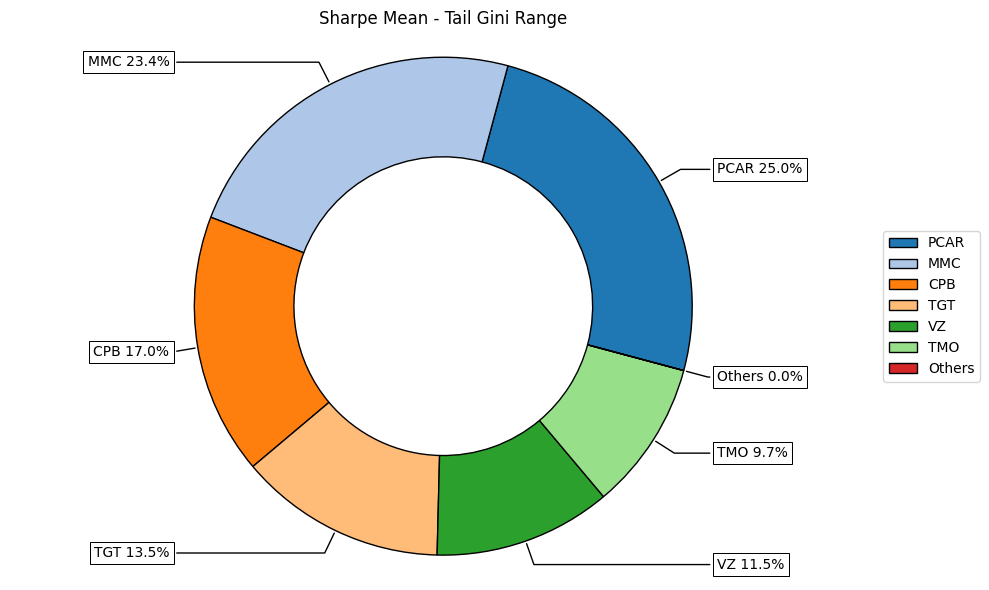

In [4]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w,
                 title='Sharpe Mean - Tail Gini Range',
                 others=0.05,
                 nrow=25,
                 cmap = "tab20",
                 height=6,
                 width=10,
                 ax=None)

### 2.3 Plotting range risk measures

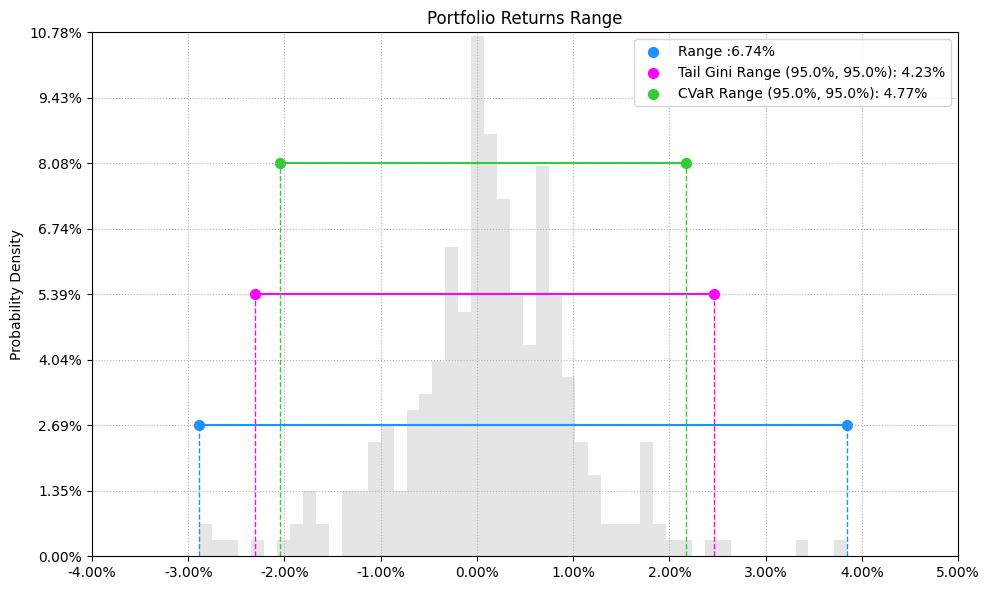

In [5]:
ax = rp.plot_range(returns=Y,
                   w=w,
                   alpha=0.05,
                   a_sim=100,
                   beta=None,
                   b_sim=None,
                   bins=50,
                   height=6,
                   width=10,
                   ax=None)

### 2.4 Calculate efficient frontier

In [6]:
points = 40 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
0,0.0000%,0.0000%,0.0000%,7.3696%,0.0000%,10.0515%,0.0000%,0.0000%,0.0000%,0.6135%,...,0.0000%,0.0000%,30.2666%,4.6824%,7.0148%,0.8392%,0.0000%,0.0000%,15.8283%,8.9166%
1,0.0000%,0.0000%,0.0000%,7.1828%,0.0000%,0.0000%,1.1860%,0.0000%,0.0000%,0.0000%,...,0.0000%,8.6362%,28.5855%,10.9674%,4.5392%,4.5091%,1.2039%,0.0000%,14.6137%,0.0000%
2,0.0000%,0.0000%,0.0000%,4.9002%,0.0000%,0.0000%,5.2119%,0.0000%,0.0000%,0.0000%,...,0.0000%,15.8238%,23.1783%,8.2406%,0.0001%,5.7199%,2.9024%,0.0000%,13.9261%,0.0000%
3,0.0000%,0.0000%,0.0000%,0.8079%,0.0000%,0.0000%,7.8421%,0.0000%,0.0000%,0.0000%,...,0.0000%,18.7129%,16.4909%,8.1315%,1.0778%,6.7217%,6.2624%,0.0000%,13.7981%,0.0000%
4,0.0000%,0.0000%,0.0000%,0.8541%,0.0000%,0.0000%,10.9905%,0.0000%,0.0000%,0.0000%,...,0.0000%,20.3671%,9.5279%,6.8387%,0.5391%,8.5281%,8.1226%,0.0000%,13.9304%,0.0000%


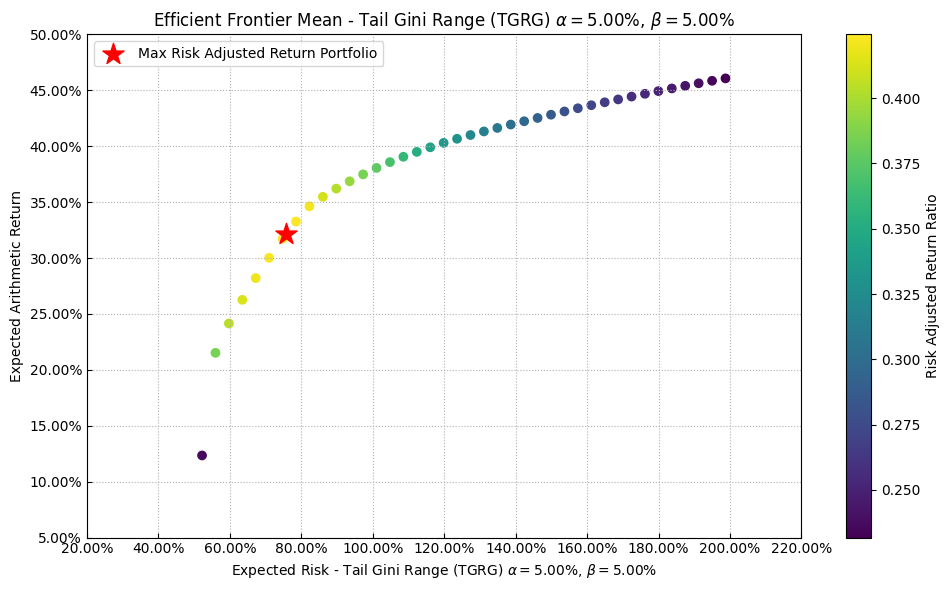

In [7]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

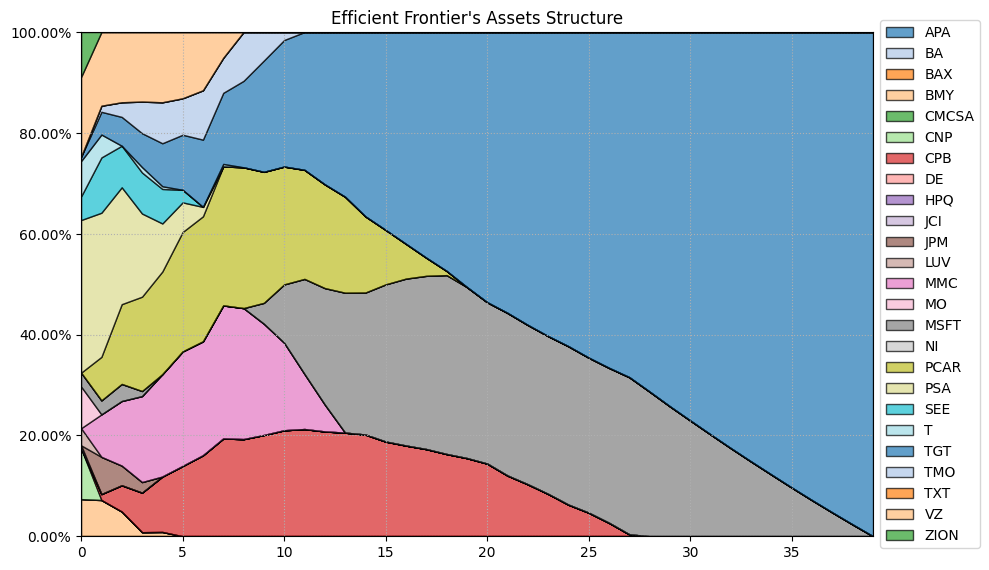

In [8]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)


## 3. Estimating Risk Parity Portfolios for Tail Gini Range

### 3.1 Calculating the risk parity portfolio for Tail Gini Range.

In [9]:
b = None # Risk contribution constraints vector

w_rp = port.rp_optimization(model=model, rm=rm, rf=rf, b=b, hist=hist)

display(w_rp.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,2.1302%,2.8622%,3.5149%,4.0178%,3.4825%,6.5409%,4.1653%,2.4020%,2.7498%,3.5057%,...,5.5538%,3.1785%,11.0163%,4.0249%,3.8998%,3.0813%,3.0958%,2.8564%,6.4235%,3.4934%


### 3.2 Plotting portfolio composition

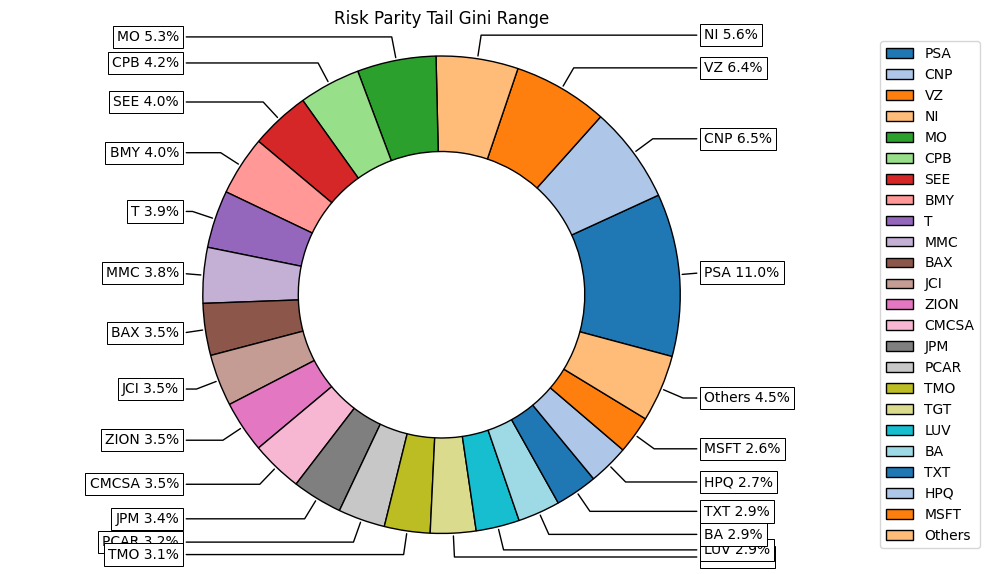

In [10]:
ax = rp.plot_pie(w=w_rp, title='Risk Parity Tail Gini Range', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 3.3 Plotting Risk Composition

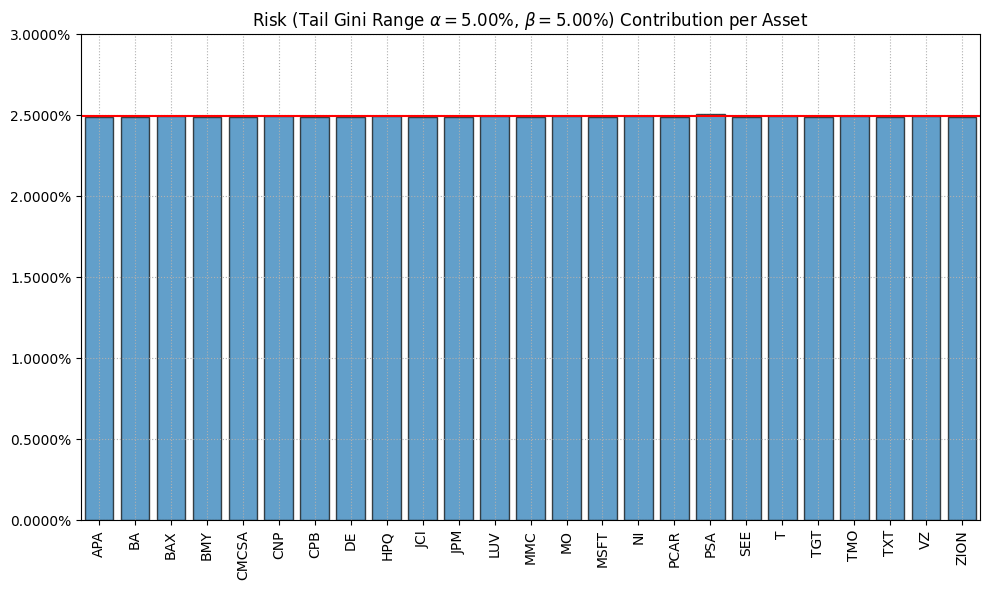

In [11]:
ax = rp.plot_risk_con(w_rp, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.05,
                      color="tab:blue", height=6, width=10, ax=None)